# EDA

- 패키지와 데이터 불러오기
- 단변량 분석
    - 결측치 여부 조사
    - 열 각각의 원소의 개수 추출
    - 정상과 불량간의 히스토그램 비교
- 이변량 분석
    - 정상과 불량간의 상관성의 차이가 존재하는가?
    - Logistic Regression P value

## 패키지와 데이터 불러오기

In [34]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 데이터 불러오기
train = pd.read_csv("C:/bad_web/data/train_dataset.csv")
train.drop(columns =  ['Unnamed: 0'], inplace = True)
train['Result_v1'] = train['Result_v1'].apply(lambda x: -1 if x == 'malicious' else 1) # target값 수치로 전환

## 단변량 분석

### 결측치 여부 조사

In [35]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

### 열 각각의 원소의 개수 추출

In [36]:
# 열 개수 추출 함수 만들기
def unique_len(columns) :
    return len(train[columns].unique())

# 열 개수 추출하기
for i in train.columns :
    print(i, unique_len(i))

url_len 242
url_num_hyphens_dom 8
url_path_len 204
url_domain_len 68
url_hostname_len 67
url_num_dots 17
url_num_underscores 13
url_query_len 78
url_num_query_para 9
url_ip_present 2
url_entropy 2524
url_chinese_present 1
url_port 2
html_num_tags('iframe') 14
html_num_tags('script') 78
html_num_tags('embed') 3
html_num_tags('object') 7
html_num_tags('div') 302
html_num_tags('head') 4
html_num_tags('body') 4
html_num_tags('form') 14
html_num_tags('a') 300
html_num_tags('applet') 1
Result_v1 2


In [37]:
# 범주형 변수라고 생각하는 변수 추출
print("url_ip_present")
print(train['url_ip_present'].value_counts())
print()
print('url_port')
print(train['url_port'].value_counts())

url_ip_present
0.0    3441
1.0     223
Name: url_ip_present, dtype: int64

url_port
0.0    3656
1.0       8
Name: url_port, dtype: int64


### 정상과 불량간의 히스토그램 비교

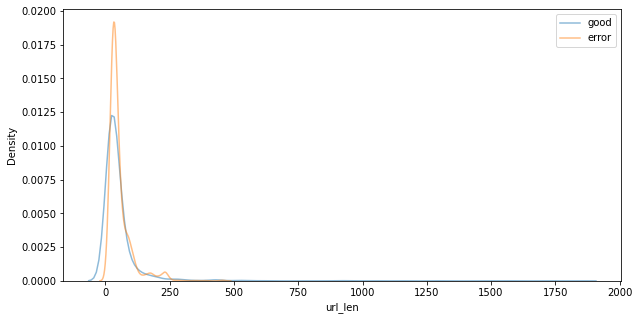

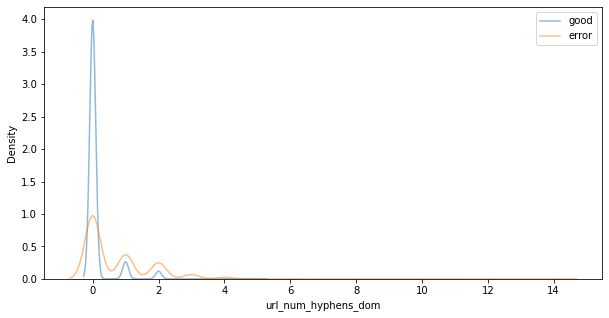

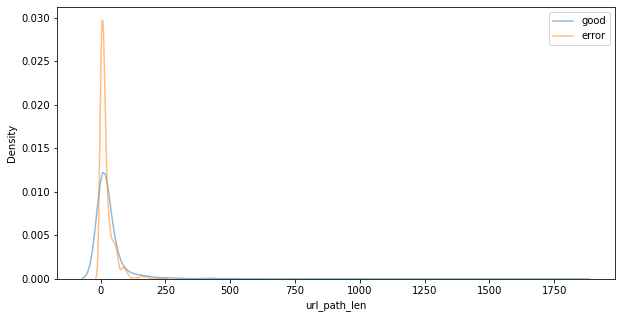

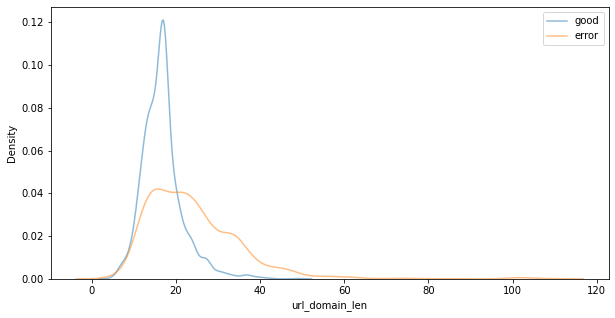

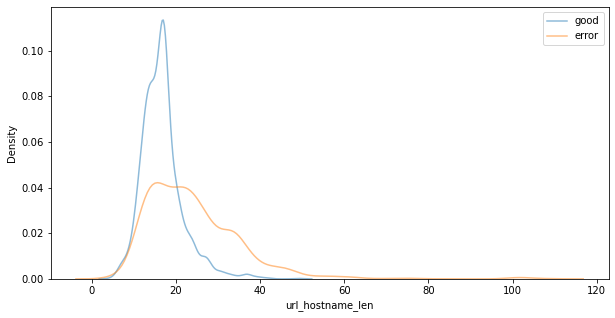

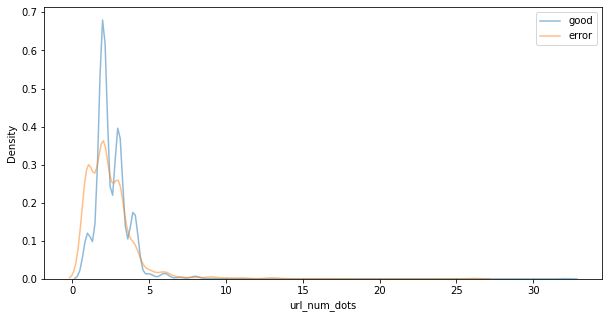

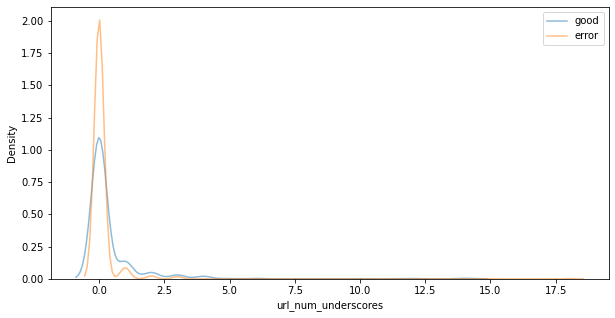

c:\Users\user\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


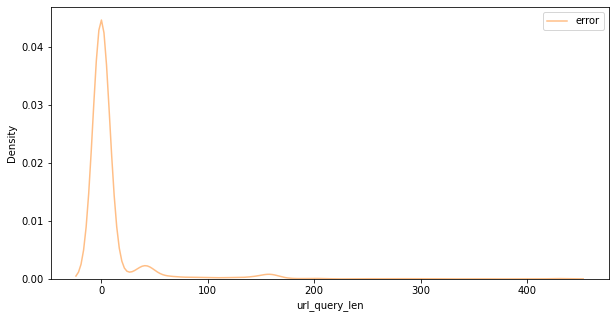

c:\Users\user\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


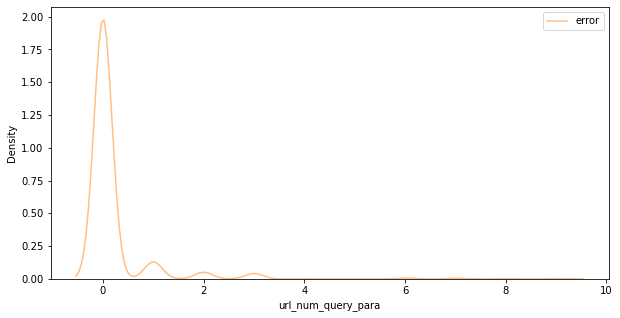

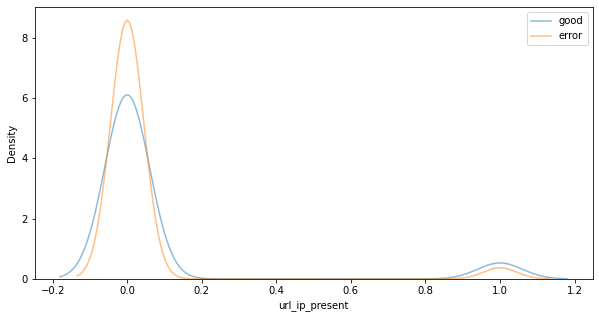

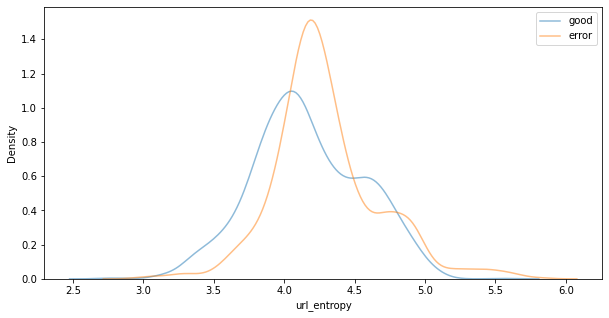

c:\Users\user\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\user\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


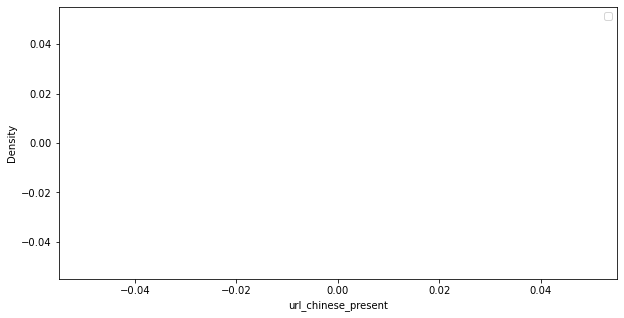

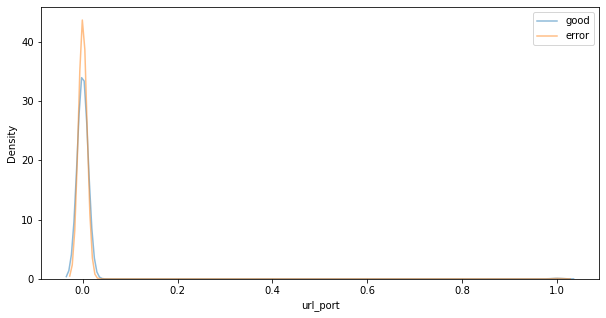

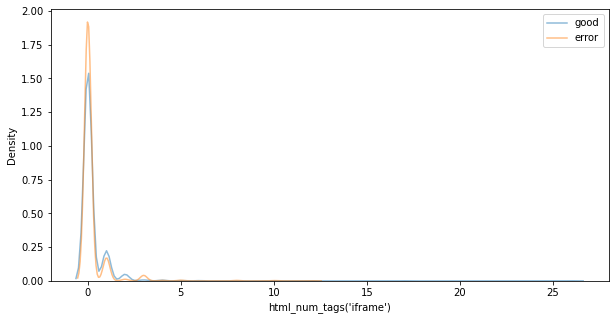

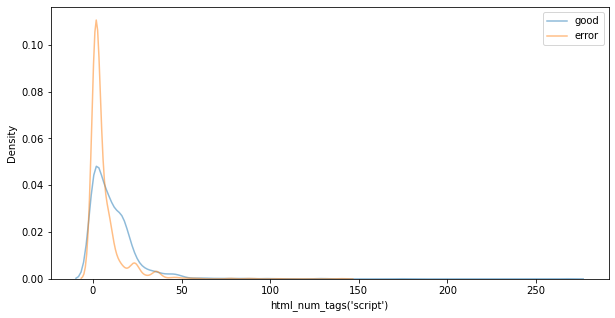

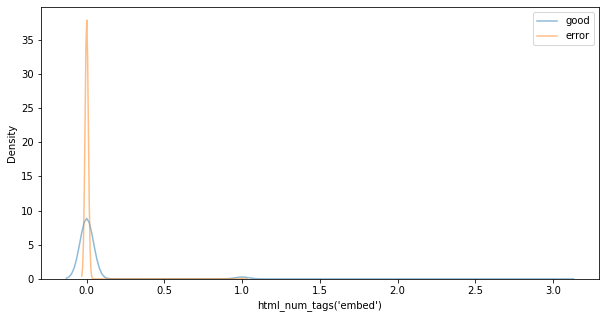

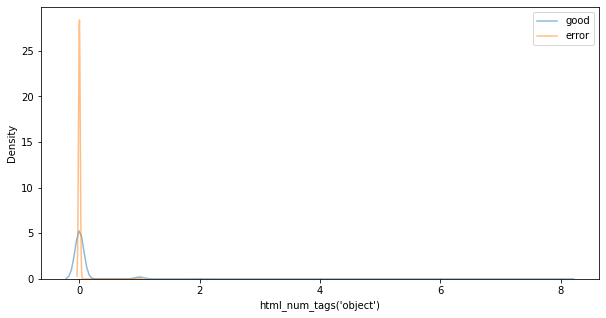

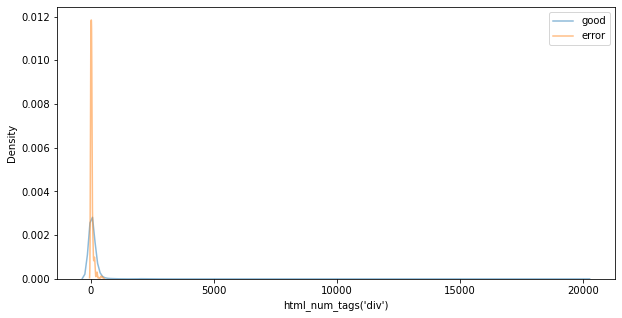

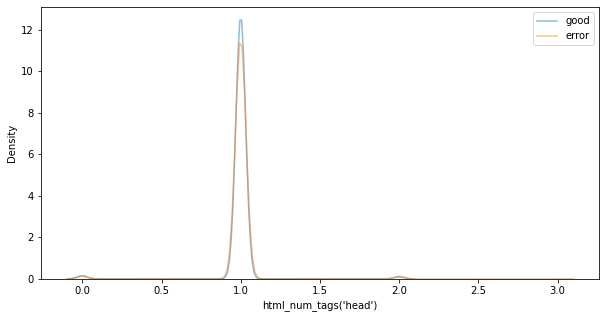

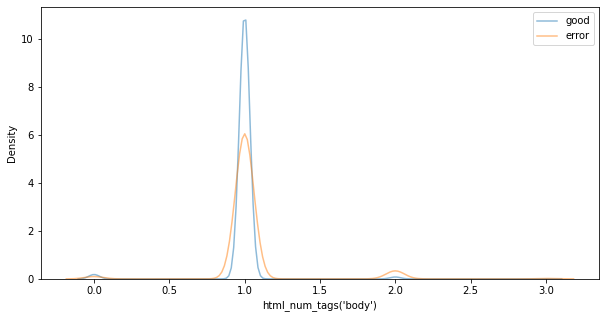

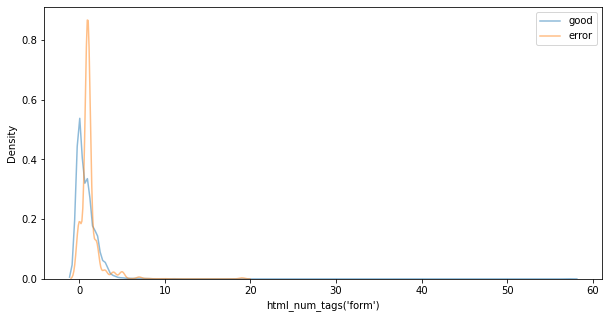

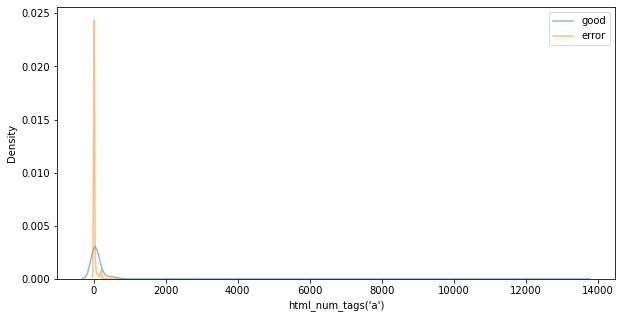

c:\Users\user\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\user\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


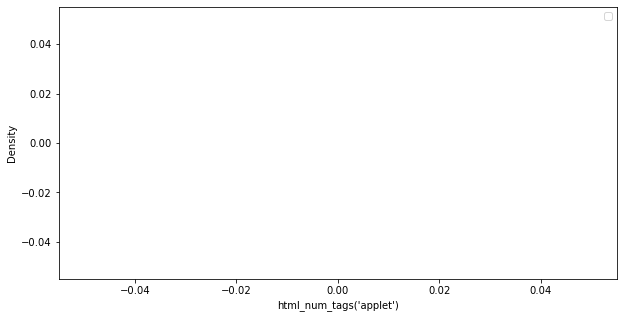

In [38]:
# 정상과 불량에 관한 플랏 생성기
def plot_good_and_error(df, column):
    good = df[df['Result_v1'] == 1][column]
    error = df[df['Result_v1'] == -1][column]
    plt.figure(figsize = (10, 5))
    sns.kdeplot(good, alpha = 0.5, label = 'good')
    sns.kdeplot(error, alpha = 0.5, label = 'error')
    plt.legend(loc = 'upper right')
    plt.show()

plt.rcParams['font.size'] = 10

# 히스토그램 추출
for i in train.columns :
    if i != 'Result_v1' :
        plot_good_and_error(train, i)

## 이변량 분석

### 정상과 불량간의 상관성의 차이가 존재하는가?

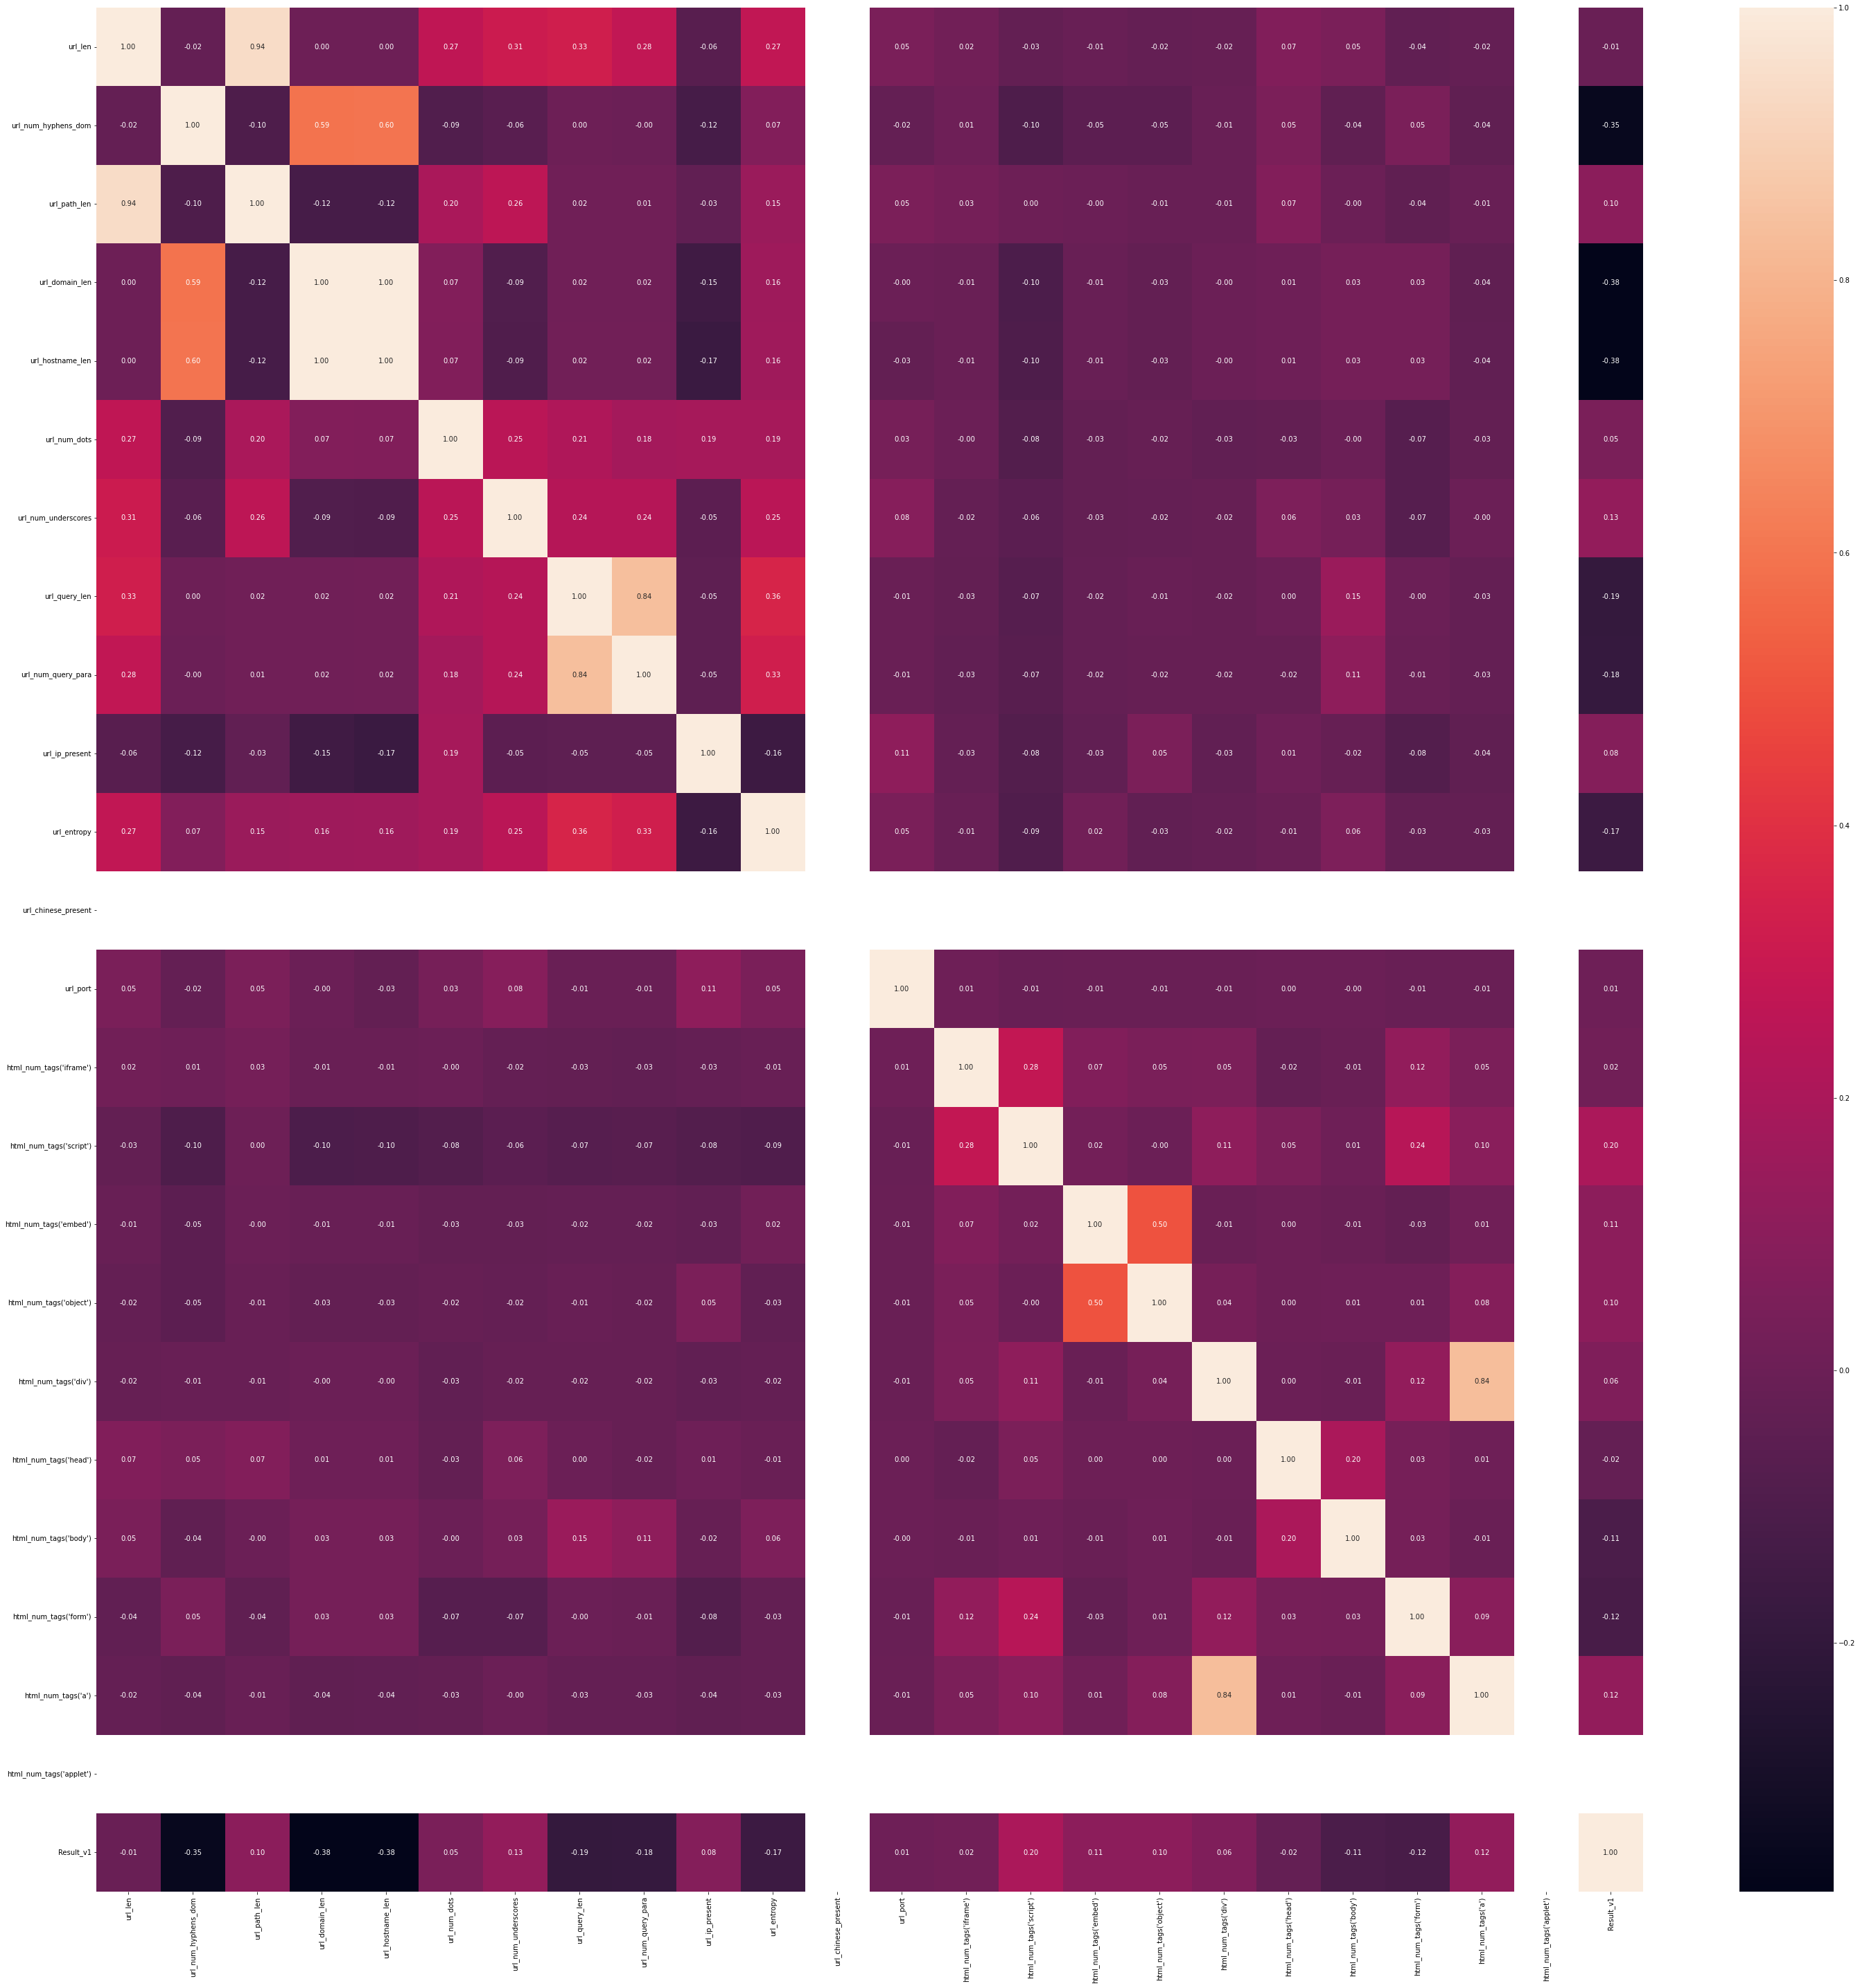

In [39]:
# 전체 상관분석
plt.figure(figsize = (50,50))
sns.heatmap(train.corr(), annot = True, fmt = '.2f')
plt.rcParams["font.size"] = 30

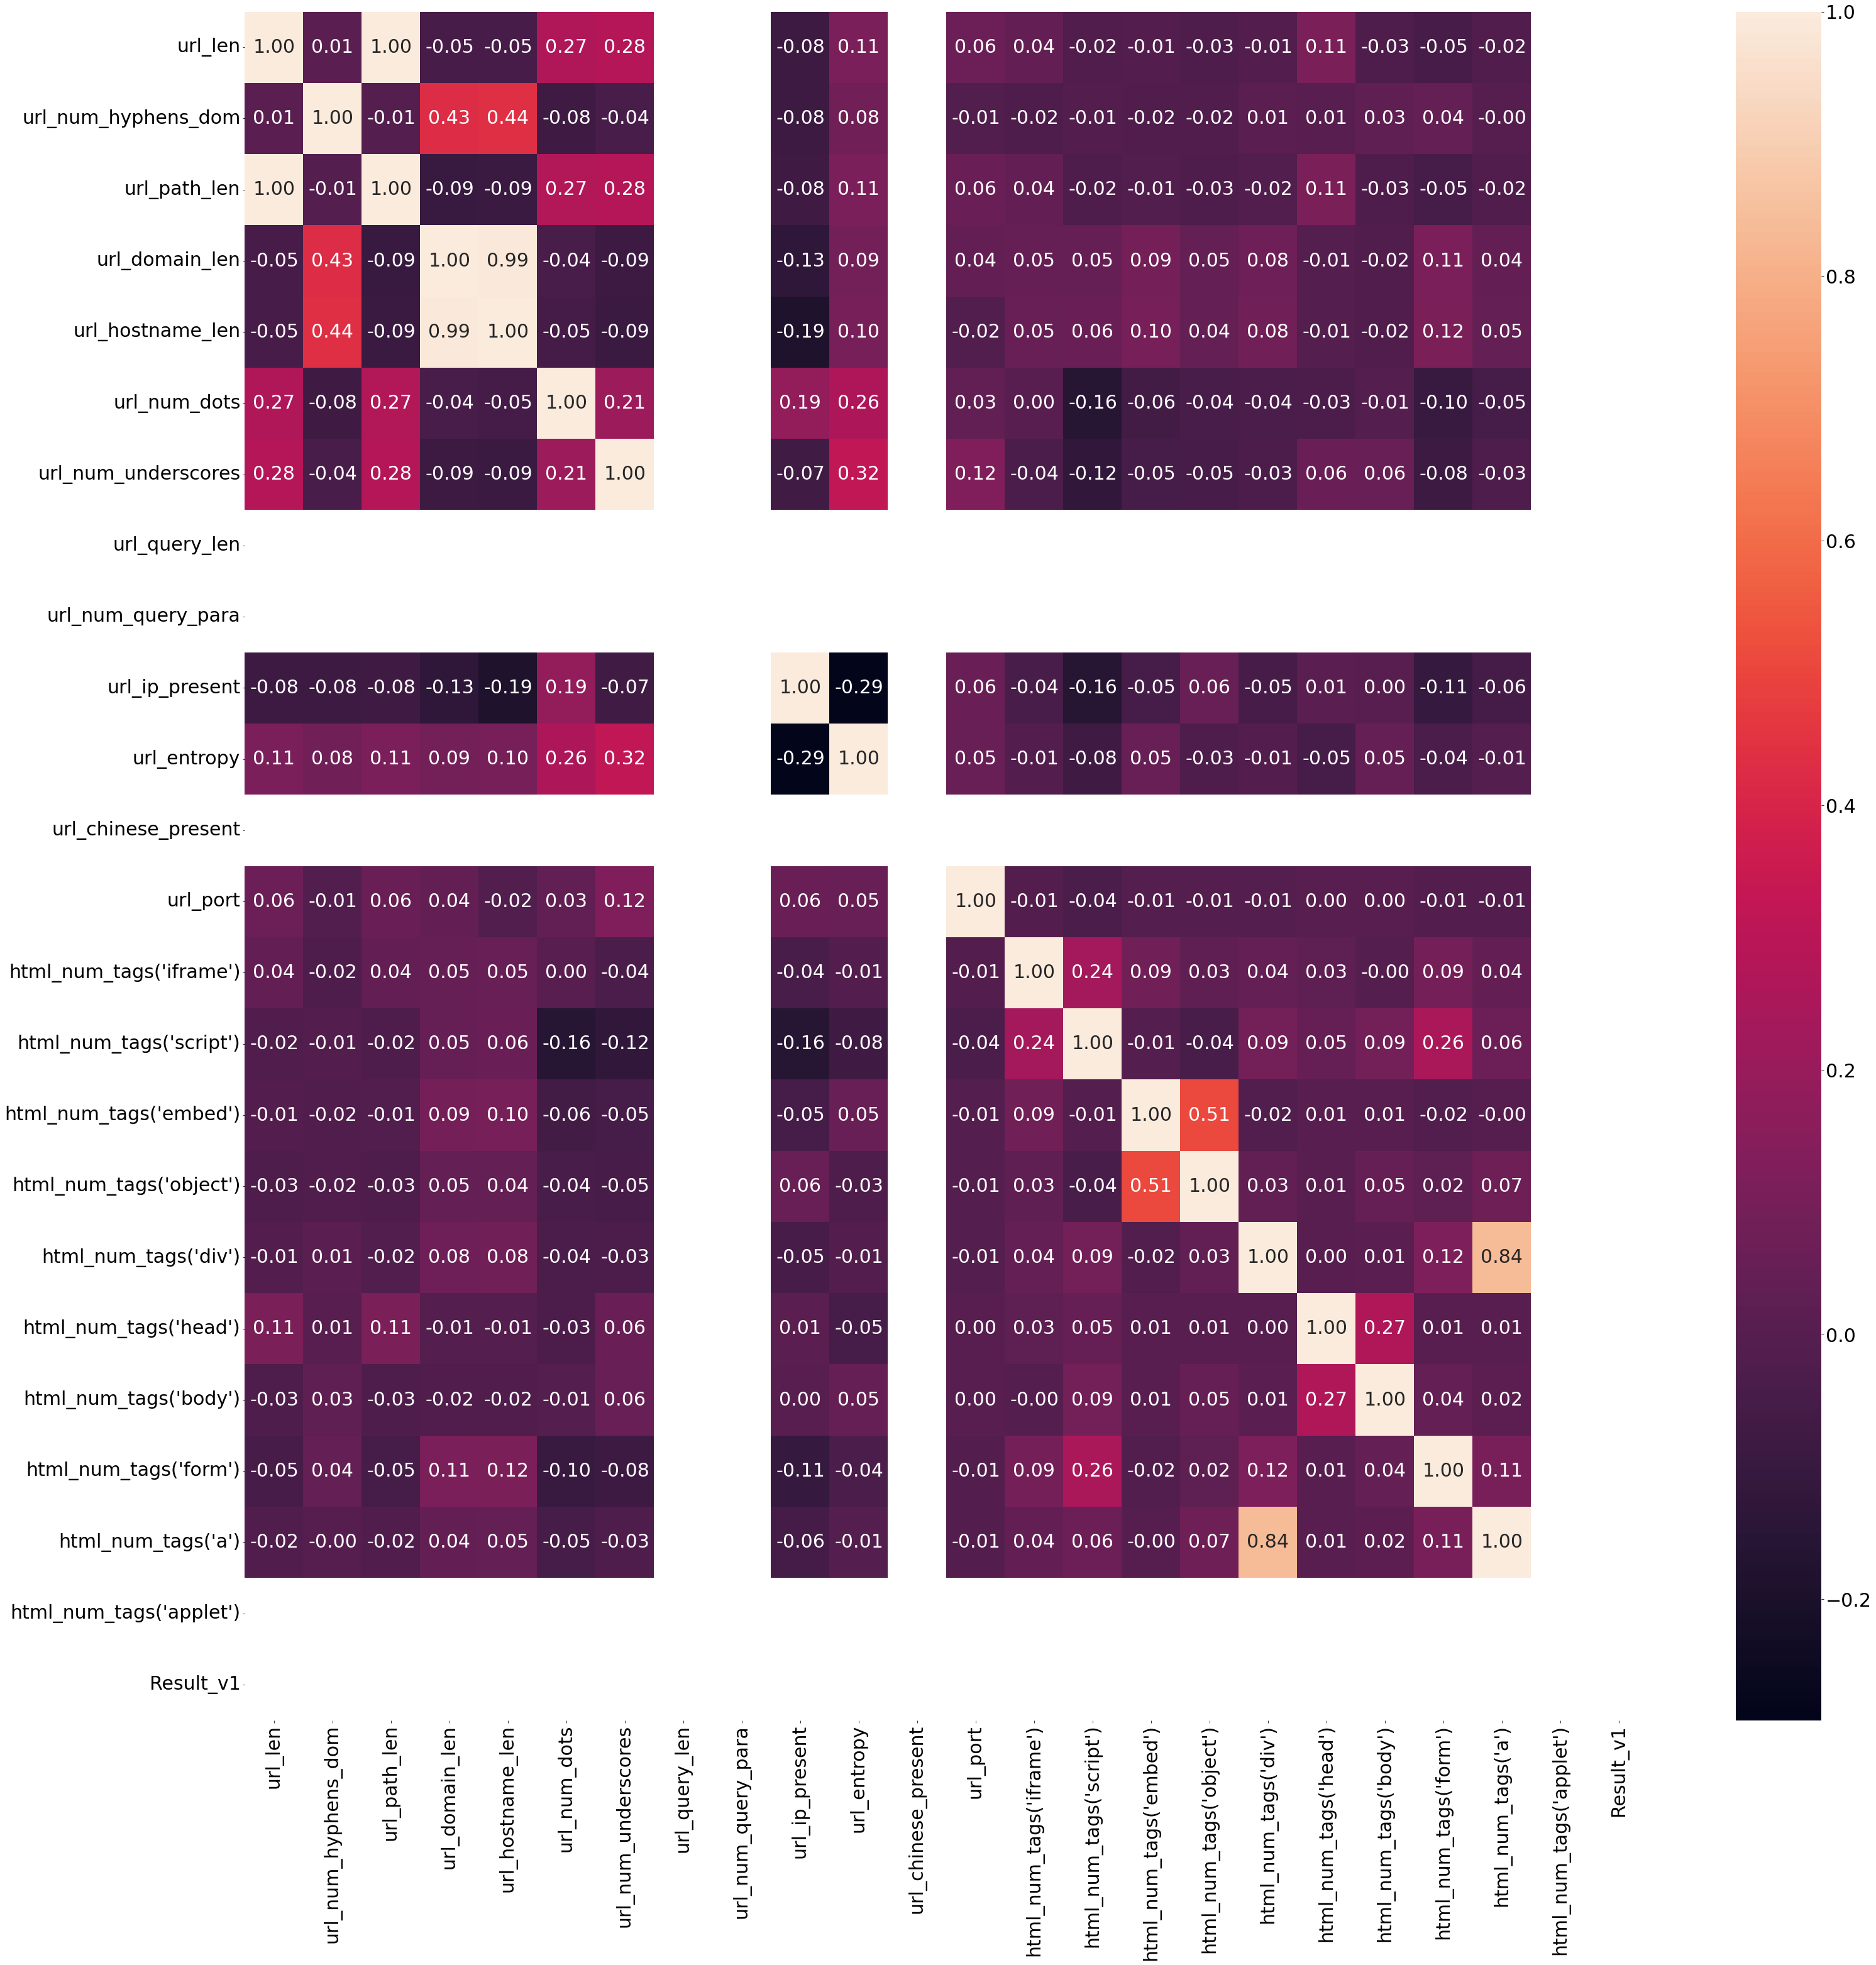

In [40]:
# 정상 상관분석
plt.figure(figsize = (50,50))
sns.heatmap(train[train['Result_v1'] == 1].corr(), annot = True, fmt = '.2f')
plt.rcParams["font.size"] = 30

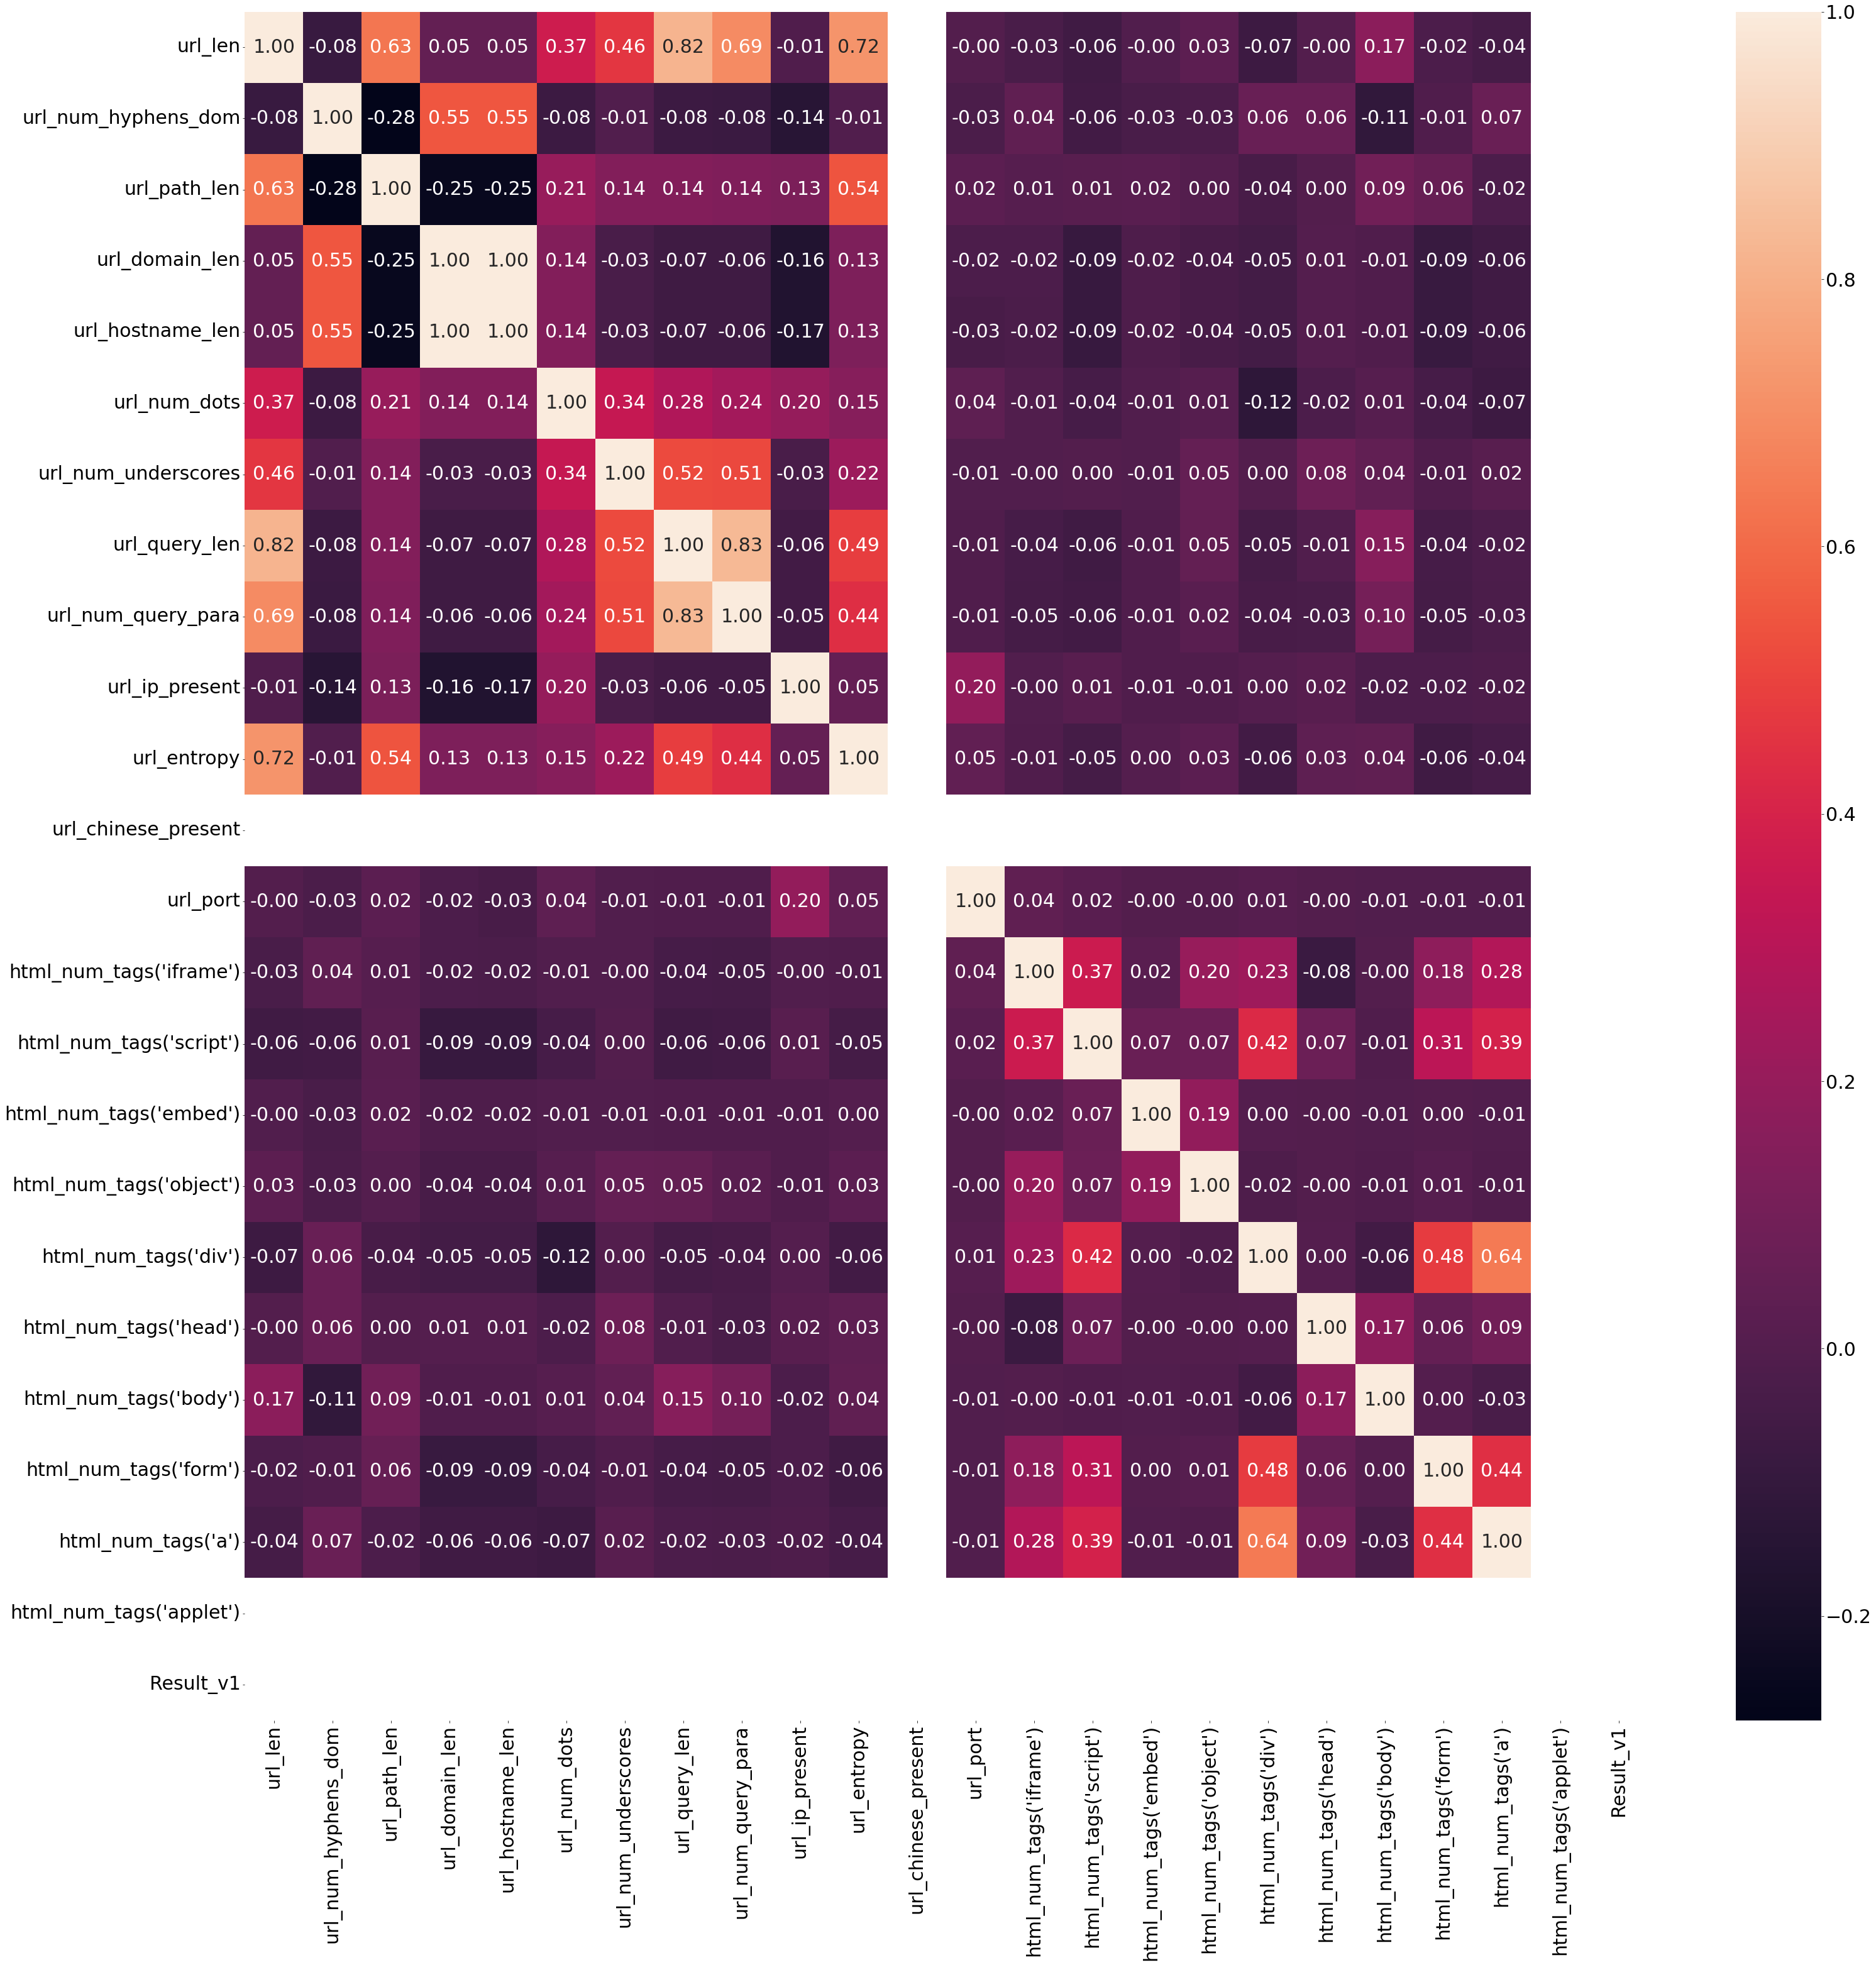

In [41]:
# 불량 상관분석
plt.figure(figsize = (50,50))
sns.heatmap(train[train['Result_v1'] == -1].corr(), annot = True, fmt = '.2f')
plt.rcParams["font.size"] = 30

### Rogistic Regression P value

In [42]:
# 로지스틱 회귀분석을 위한 열 선택
col_list = list(train.columns)
col_list.remove("Result_v1")
col_list.remove("url_chinese_present")
col_list.remove("html_num_tags('applet')")

# 로지스틱 회귀 분석을 위한 데이터 셋 생성
to_logistic_data  =train.dropna()

# 로지스틱 회귀 분석은 target값이 0 또는 1이어야함.
to_logistic_data['Result_v1'] = to_logistic_data["Result_v1"].apply(lambda x : 1 if x == -1 else 0)

# 로지스틱 모형에서 P value를 추출하는 함수
def logistic(columns) :
    model = sm.Logit(to_logistic_data['Result_v1'], to_logistic_data[columns])
    result = model.fit()
    return result.pvalues

# 결과 추출
for i in col_list :
    print(i)
    print(logistic(i))
    print()

url_len
Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_len    0.932637
dtype: float64

url_num_hyphens_dom
Optimization terminated successfully.
         Current function value: 0.631764
         Iterations 6
url_num_hyphens_dom    1.208474e-61
dtype: float64

url_path_len
Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 5
url_path_len    4.907666e-09
dtype: float64

url_domain_len
Optimization terminated successfully.
         Current function value: 0.681897
         Iterations 4
url_domain_len    3.815200e-19
dtype: float64

url_hostname_len
Optimization terminated successfully.
         Current function value: 0.681520
         Iterations 4
url_hostname_len    1.028186e-19
dtype: float64

url_num_dots
Optimization terminated successfully.
         Current function value: 0.692513
         Iterations 3
url_num_dots    0.031656
dtype: float64

url_num_underscores
Optimization

C:\Users\user\AppData\Local\Temp\ipykernel_20008\4293647527.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_logistic_data['Result_v1'] = to_logistic_data["Result_v1"].apply(lambda x : 1 if x == -1 else 0)
c:\Users\user\miniconda3\envs\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\miniconda3\envs\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
